In [1]:
import pandas as pd
from fastai.vision.all import *

In [2]:
path = 'E:/Bees/Images'

In [7]:
dblock = DataBlock(blocks=(ImageBlock(), CategoryBlock()),
                   get_items=get_image_files,
                   get_y=parent_label,
                   item_tfms=Resize(460),
                   batch_tfms=aug_transforms(size=400, min_scale=0.75))
dls = dblock.dataloaders(path, bs=64)

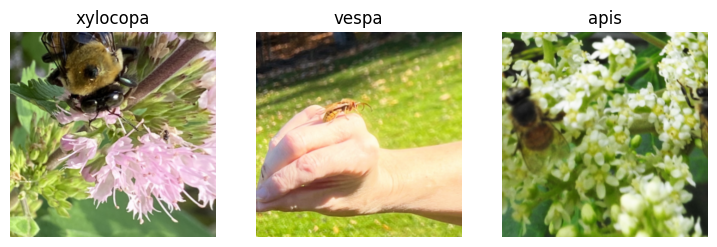

In [8]:
dls.show_batch(nrows=1, ncols=3)

In [9]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 67272 items
2 datasets of sizes 53818,13454
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      E:\Bees\Images\scoliidae\scoliidae3903524973.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=1152x2048
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      E:\Bees\Images\scoliidae\scoliidae3903524973.jpg
    applying parent_label gives
      scoliidae
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(5)

Final sample: (PILImage mode=RGB size=1152x2048, TensorCategory(5))


Found 67272 items
2 datasets of sizes 53818,13454
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after

In [4]:
model = xresnet50(n_out=dls.c)
learn = Learner(dls, model, loss_func=CrossEntropyLossFlat(), metrics=accuracy)
learn.fit_one_cycle(5, 3e-3)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 